# Projekt 1 - eksploracja danych

Zbiór danych dostępny jest pod adresem: https://www.apispreadsheets.com/datasets/110. Przedstawia on osiągnięcia uczniów dwóch szkół w Portugalii, w tym przewidywane oceny końcowe dla poszczególnych osób.

### Załadowanie potrzebnych pakietów

In [22]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 
import math
import warnings
from pandas_profiling import ProfileReport

warnings.filterwarnings('ignore')

## Wczytanie danych i wstępne sprawdzenie danych

In [15]:
grades_df=pd.read_csv('https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/school_grades_dataset.csv')
grades_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [16]:
grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Jak widać w naszych danych nie ma wartości NULL, czyli nie ma braków danych. 
Poniżej informacje o tym jakie atrybuty zostały przedstawione w naszych danych, a także krótkie ich opisy.

In [17]:
grades_df.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [25]:
attributes_df = pd.read_csv('attributes_school_grades.csv')
pd.set_option('display.max_colwidth', 150)
attributes_df

,name,type,description
0,school,string,student's school (binary: <GP> Gabriel Pereira or <MS> Mousinho da Silveira)
1,sex,string,student's sex (binary: <F> female or <M> male)
2,age,integer,student's age (numeric: from 15 to 22)
3,address,string,student's home address type (binary: <U> urban or <R> rural)
4,famsize,string,family size (binary: <LE3> less or equal to 3 or <GT3> greater than 3)
5,Pstatus,string,parent's cohabitation status (binary: <T> living together or <A> apart)
6,Medu,integer,"mother's education (numeric: 0: none, 1: primary education (4th grade), 2: 5th to 9th grade, 3 _ secondary education or 4 _ higher education)"
7,Fedu,integer,"father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 _ 5th to 9th grade, 3 _ secondary education or 4 _ higher education)"
8,Mjob,string,"mother's job (nominal: <teacher>, <health> care related, civil <services> (e.g. administrative or police), <at_home> or <other>)"
9,Fjob,string,"father's job (nominal: <teacher>, <health> care related, civil <services> (e.g. administrative or police), <at_home> or <other>)"


In [26]:
grades_df.duplicated().value_counts()

False    649
dtype: int64

6 z 32 atrybutów jest przedstawione jako zmienne o typach integer, a pozostałe jako string. Brak powtórzeń rekordów w naszym zbiorze danych.

## Dane liczbowe
Sprawdzamy komórki z wartościami liczbowymi.

In [27]:
grades_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


**failures**, **traveltime**, **studytime**, mają dosyć niskie odchylenie standardowe (bliskie zera), co sugeruje rozkład bliski rozkładowi jednopunktowemu. Nie jest to jednak nic niespodziewanego, ponieważ są to zmienne dyskretne o tylko czterech możliwych wartościach i tak na prawdę ich charakter jest bardziej kategoryczny niż liczbowy. **absences** ma średnią większą od mediany, co sugeruje przechylenie rozkładu w lewą stronę. Widzimy także, że wszystkie wartości liczbowe są w dosyć wąskim zakresie od $0$ do $32$.

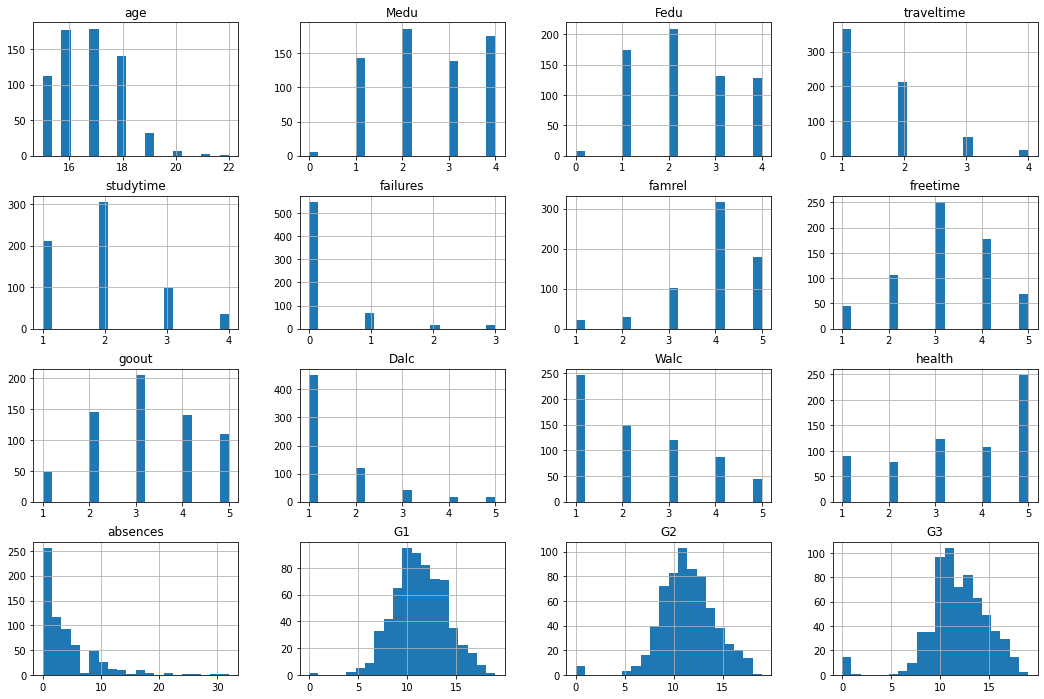

In [28]:
grades_df.hist(bins = 20, figsize=(18,12))
plt.show()

Rozkłady wyników egzaminów za pierwszy i drugi okres (**G1**, **G2**) przypomina rozkład normalny z wartościami odstającymi w $0$. Rozkład normalny można także zauważyć w kolumnach **freetime**, **goout** opisujące odpowiednio ilość wolnego czasu i spędzanie czasu wolnego z przyjaciółmi. Rozkład **absences** przypomina rozkład wykładniczy, zatem nie posiada wartości odstających. Widzimy, że większość uczniów jest w wieku między $15-19$ lat.

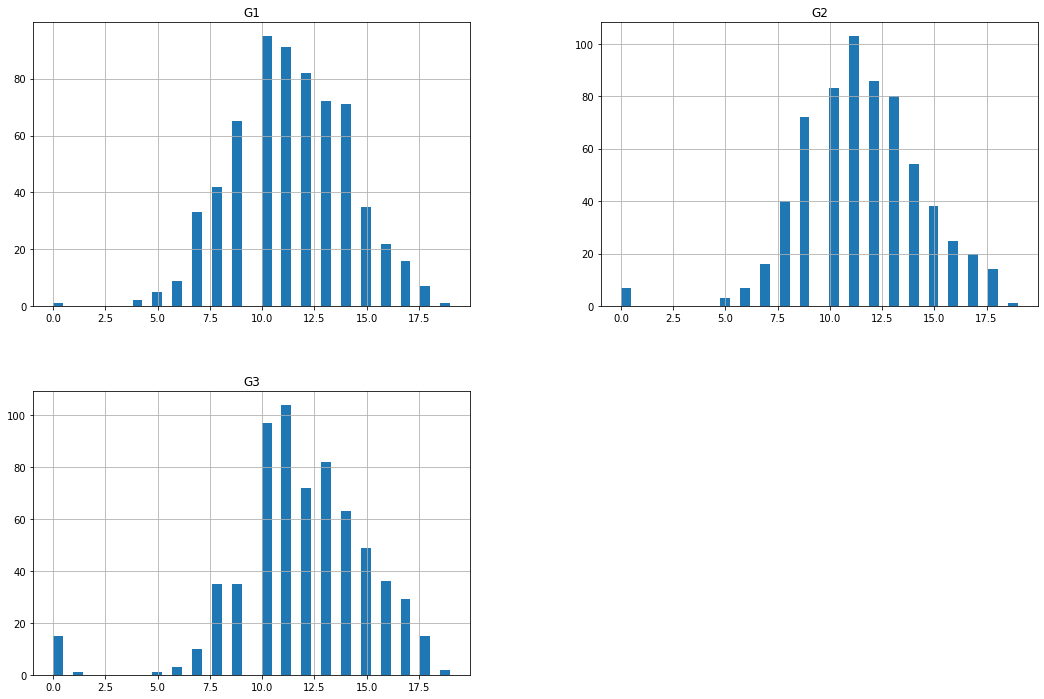

In [9]:
grades_df[["G1", "G2", "G3"]].hist(bins = 40, figsize=(18,12))
plt.show()

Zwiększając liczbę słupków (*bins*) dla kolumn pokazujących wyniki egzaminów widzimy brak słupka tuż przed $10$, co może sugerować, że $10$ było progiem zdania każdego z egzaminów.

## Dane kategoryczne

Teraz przyjrzyjmy się zmiennym kategorycznym znajdującym się w naszym zbiorze.

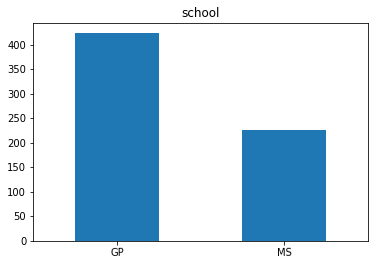

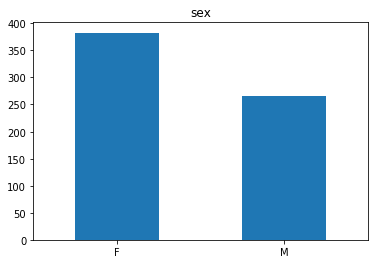

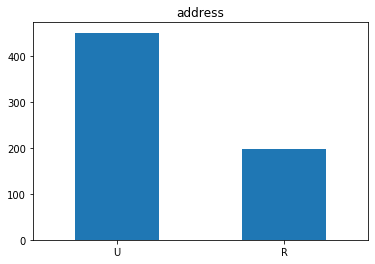

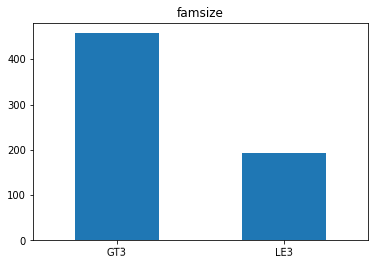

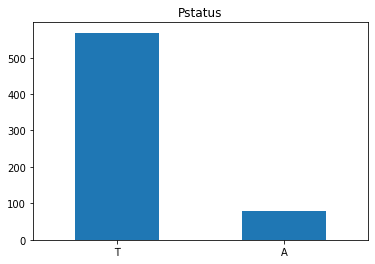

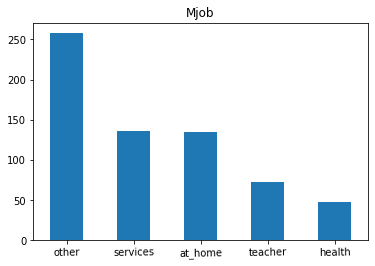

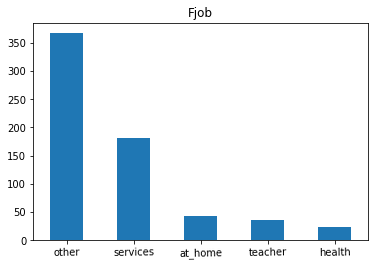

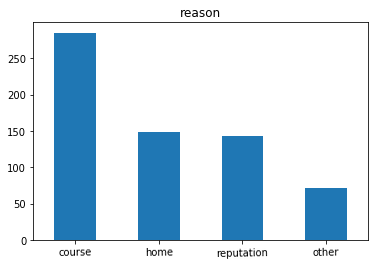

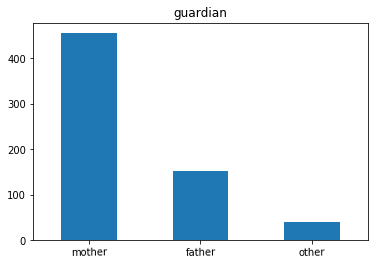

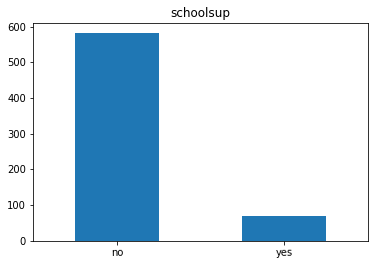

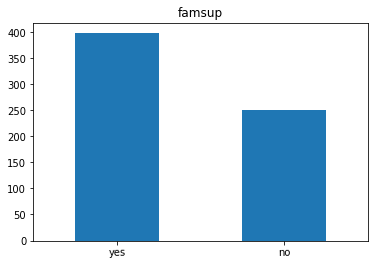

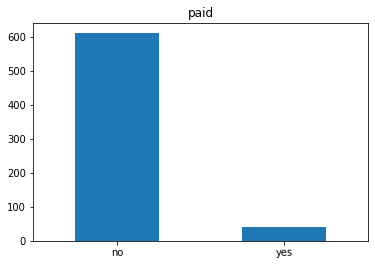

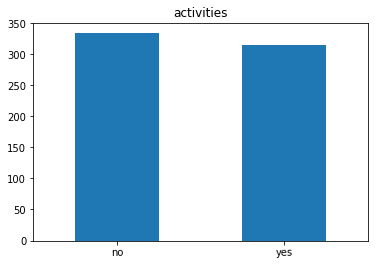

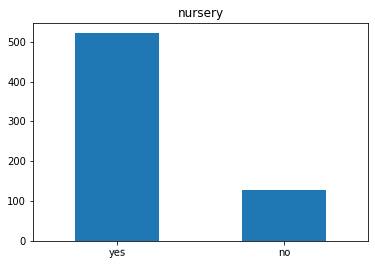

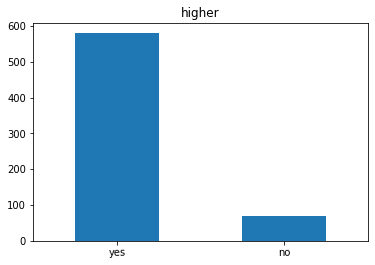

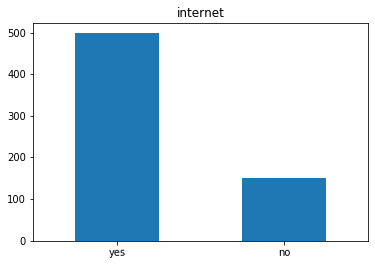

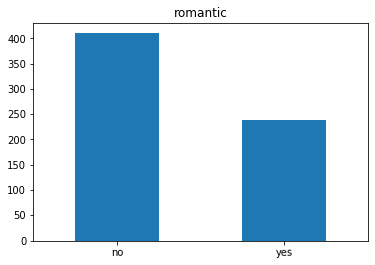

In [13]:
for column in grades_df:
    if pd.api.types.is_object_dtype(grades_df[column]):
        plt.figure(column)
        plt.title(column)
        grades_df[column].value_counts().plot(kind = 'bar', rot = 1)

Widzimy znaczną przewagę jednej wartości w kolumnach **famsize, Pstatus, guardian, schoolsup, paid, nursery, higher, internet**, które mówią kolejno, że 
* większość rodzin jest co najmniej 3 osobowa, nierozbita
* opiekunem ucznia jest głównie matka
* większość uczniów 
    * nie ma dodatkowych zajęć, 
    * głównie pomaga im rodzina, 
    * nie bierze udziału w płatnych dodatkowych klasach,
    * uczęszczało do przedszkola,
    * chce pójść na uczelnię wyższą,
    * ma dostęp do internetu w domu.

## Zależności między kolumnami

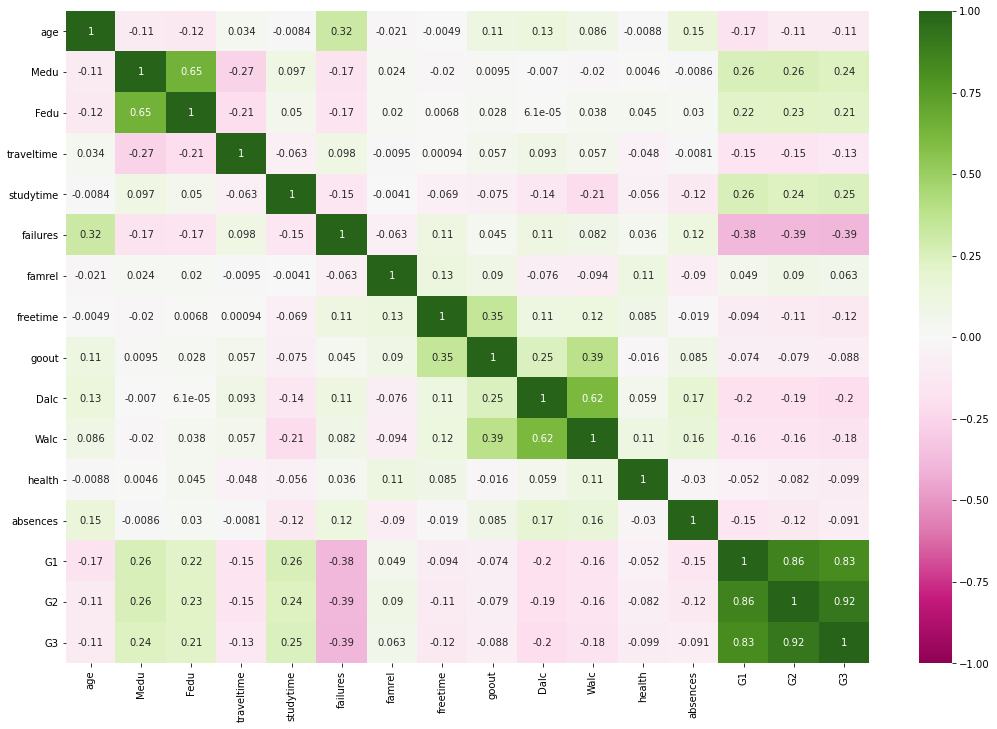

In [33]:
corMatrix = grades_df.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corMatrix, annot=True, vmin=-1, cmap="PiYG")
plt.show()

Widzimy pewne korelacje pomiędzy:
* wynikami poszczególnych egzaminów (wartości **G1**,**G2**,**G3**)
* **Medu** i **Fedu**, co sugeruję, że rodzice dzieci, są dosyć często tego samego wykształcenia.
* **Walc** i **Dalc**, zmienne opisujące spożycie alkoholu w weekend i dni robocze

Interesująca nas kolumna **G3** jest tylko słabo zależna (niezależna), do kolumn takich jak
* goout - wyjścia na zewnątrz ze znajomymi
* famrel - jakość relacji w rodzinie
* health - zdrowie
* absence - liczba absencji

#### Poniżej zwizualizujmy kilka zależności:

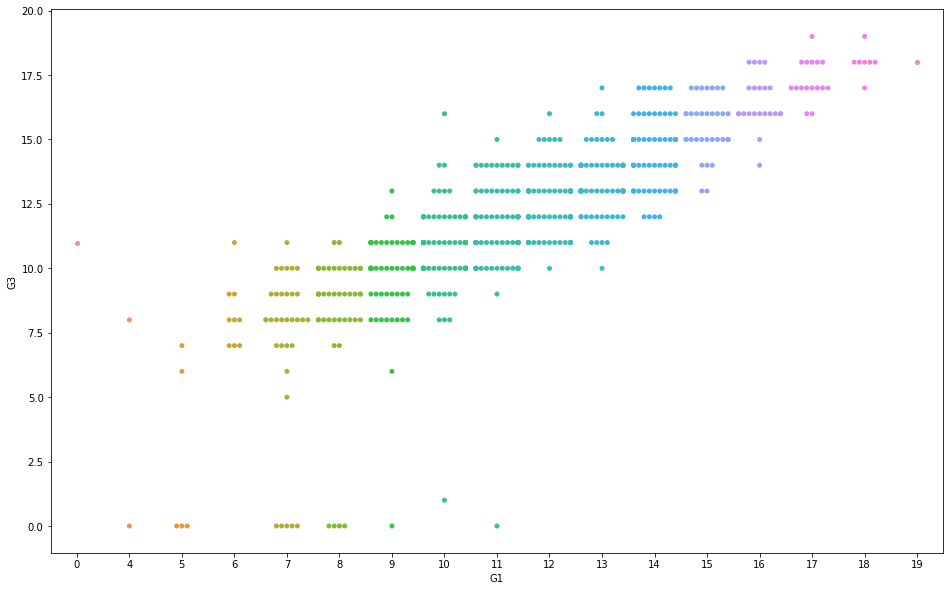

In [24]:
plt.figure(figsize=(16,10))
sns.swarmplot(data=grades_df, x="G1", y="G3") #swarmplot dodaje szum przez co widać więcej obserwacji
plt.show()

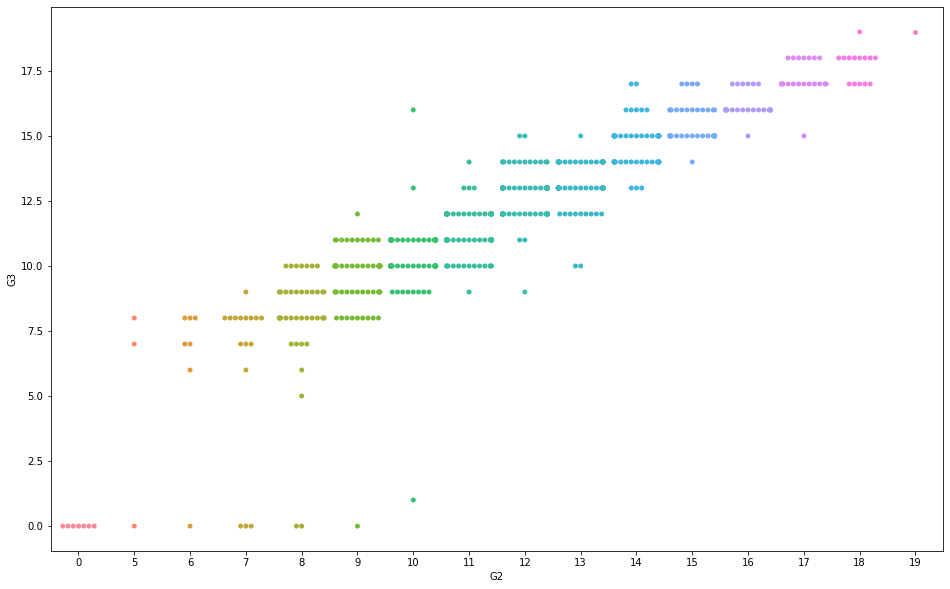

In [14]:
plt.figure(figsize=(16,10))
sns.swarmplot(data=grades_df, x="G2", y="G3")
plt.show()

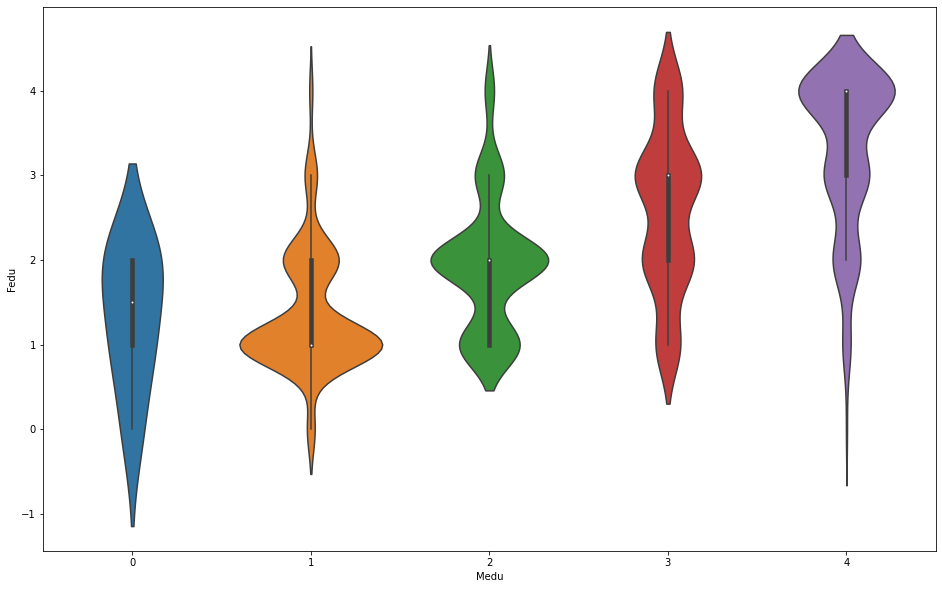

In [15]:
plt.figure(figsize=(16,10))
sns.violinplot(data=grades_df, x="Medu", y="Fedu")
plt.show()

Poniżej wykresy dla zależności zmiennych kategorycznych, a wynikiem ostatecznego testu.

Pierwszy z nich przedstawia zależności między wynikiem testu G3 a informacją czy studenci otrzymujądodatkową pomoc edukacyjną.

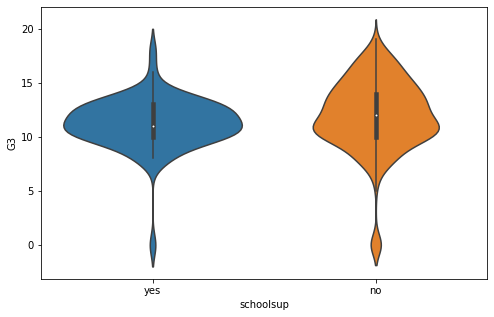

In [27]:
plt.figure(figsize=(8,5))
sns.violinplot(data=grades_df, x="schoolsup", y="G3")
plt.show()

Jak widać wyniki osób otrzymujących pomoc koncentrują się w niewielkiej odległości od wyniku równego $10$. Natomiast wyniki pozostałych osób jest bardziej rozłożony pomiędzy wartości $10$ a $20$.

Następnie mamy podział wyników na osoby planujące wyższą edukację i takie, które tego nie planują. Jak widać jest znaczna różnica w rozkładzie wyników między tymi grupami.

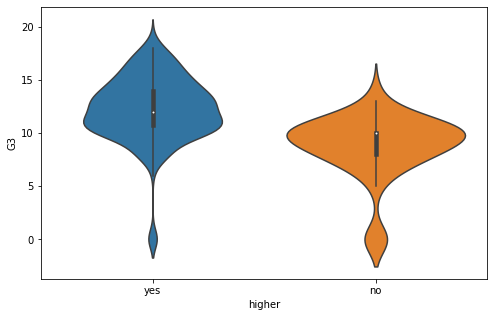

In [28]:
plt.figure(figsize=(8,5))
sns.violinplot(data=grades_df, x="higher", y="G3")
plt.show()

Kolejne dwa wykresy pokazują zależności między pracą matki (Mjob) lub pracją ojca (Fjob) a wynikami ucznia. Widać wyrażne różnice między np. kategoriami **health** oraz **at_home**. Jednak widać podobne kształty wykresu występują analogicznych kolumnach na obu wykresach.

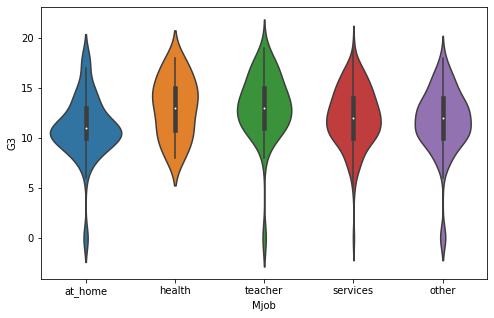

In [36]:
plt.figure(figsize=(8,5))
sns.violinplot(data=grades_df, x="Mjob", y="G3",order=["at_home", "health", "teacher", "services","other"])
plt.show()

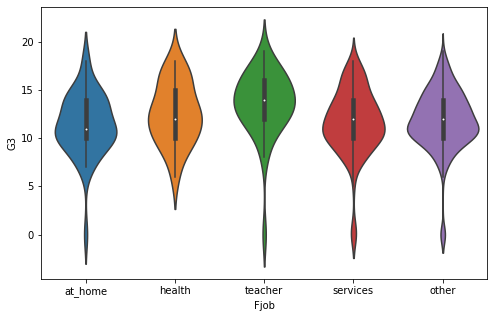

In [34]:
plt.figure(figsize=(8,5))
sns.violinplot(data=grades_df, x="Fjob", y="G3", order=["at_home", "health", "teacher", "services","other"])
plt.show()

Zależności między wynikiem ostatecznego testu a powodem dla którego dany uczeń wybrał akurat tę szkołę. Najbardziej równomierny rozkład pomiędzy wartości z przedziału $10$ a $20$ jest dla kategorii **reputation**.

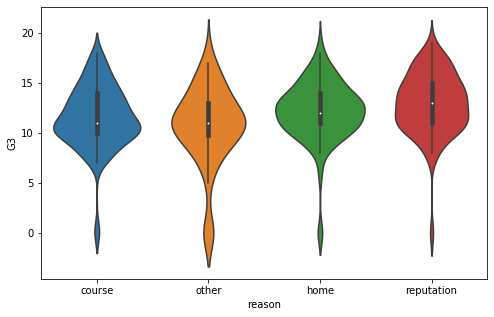

In [31]:
plt.figure(figsize=(8,5))
sns.violinplot(data=grades_df, x="reason", y="G3")
plt.show()